In [141]:
import pandas as pd
import numpy as np 
from numpy import mean
from numpy import std
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
pd.options.display.max_rows=None
pd.options.display.max_columns=None
from sklearn.metrics import accuracy_score


In [142]:
df = pd.read_csv(r"C:\Users\RVCE\Desktop\Minor_proj\collabRV\Raw Sets\DATASET FOR LSTM MODEL.csv",index_col=[1])

In [143]:
df.head(10)

,Unnamed: 0,DestinationDischarge,admission.ward,admission.way,occupation,discharge.department,visit.times,gender,body.temperature,pulse,respiration,systolic.blood.pressure,diastolic.blood.pressure,map,weight,height,BMI,type.of.heart.failure,NYHA.cardiac.function.classification,Killip.grade,myocardial.infarction,congestive.heart.failure,peripheral.vascular.disease,cerebrovascular.disease,dementia,Chronic.obstructive.pulmonary.disease,connective.tissue.disease,peptic.ulcer.disease,diabetes,moderate.to.severe.chronic.kidney.disease,hemiplegia,leukemia,malignant.lymphoma,solid.tumor,liver.disease,AIDS,CCI.score,type.II.respiratory.failure,consciousness,eye.opening,verbal.response,movement,respiratory.support.,oxygen.inhalation,fio2,acute.renal.failure,LVEF,left.ventricular.end.diastolic.diameter.LV,mitral.valve.EMS,mitral.valve.AMS,EA,tricuspid.valve.return.velocity,tricuspid.valve.return.pressure,outcome.during.hospitalization,death.within.28.days,re.admission.within.28.days,death.within.3.months,re.admission.within.3.months,death.within.6.months,re.admission.within.6.months,time.of.death..days.from.admission.,re.admission.time..days.from.admission.,return.to.emergency.department.within.6.months,time.to.emergency.department.within.6.months,creatinine.enzymatic.method,urea,uric.acid,glomerular.filtration.rate,cystatin,white.blood.cell,monocyte.ratio,monocyte.count,red.blood.cell,coefficient.of.variation.of.red.blood.cell.distribution.width,standard.deviation.of.red.blood.cell.distribution.width,mean.corpuscular.volume,hematocrit,lymphocyte.count,mean.hemoglobin.volume,mean.hemoglobin.concentration,mean.platelet.volume,basophil.ratio,basophil.count,eosinophil.ratio,eosinophil.count,hemoglobin,platelet,platelet.distribution.width,platelet.hematocrit,neutrophil.ratio,neutrophil.count,D.dimer,international.normalized.ratio,activated.partial.thromboplastin.time,thrombin.time,prothrombin.activity,prothrombin.time.ratio,fibrinogen,high.sensitivity.troponin,myoglobin,carbon.dioxide.binding.capacity,calcium,potassium,chloride,sodium,Inorganic.Phosphorus,serum.magnesium,creatine.kinase.isoenzyme.to.creatine.kinase,hydroxybutyrate.dehydrogenase.to.lactate.dehydrogenase,hydroxybutyrate.dehydrogenase,glutamic.oxaloacetic.transaminase,creatine.kinase,creatine.kinase.isoenzyme,lactate.dehydrogenase,brain.natriuretic.peptide,high.sensitivity.protein,nucleotidase,fucosidase,albumin,white.globulin.ratio,cholinesterase,glutamyltranspeptidase,glutamic.pyruvic.transaminase,glutamic.oxaliplatin,indirect.bilirubin,alkaline.phosphatase,globulin,direct.bilirubin,total.bilirubin,total.bile.acid,total.protein,erythrocyte.sedimentation.rate,cholesterol,low.density.lipoprotein.cholesterol,triglyceride,high.density.lipoprotein.cholesterol,homocysteine,apolipoprotein.A,apolipoprotein.B,lipoprotein,pH,standard.residual.base,standard.bicarbonate,partial.pressure.of.carbon.dioxide,total.carbon.dioxide,methemoglobin,hematocrit.blood.gas,reduced.hemoglobin,potassium.ion,chloride.ion,sodium.ion,glucose.blood.gas,lactate,measured.residual.base,measured.bicarbonate,carboxyhemoglobin,body.temperature.blood.gas,oxygen.saturation,partial.oxygen.pressure,oxyhemoglobin,anion.gap,free.calcium,total.hemoglobin,GCS,dischargeDay,ageCat
inpatient.number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
857781,1,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,1,Male,36.7,87,19,102,64,76.666667,50.0,1.64,18.590125,Both,III,III,0,0,0,0,0,1,0,0.0,1,0.0,0,0,0,0,0.0,0,2.0,NonTypeII,Clear,4,5,6,None,OxygenTherapy,33,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alive,0,0,0,0,0,0,NaN,NaN,0.0,NaN,108.3,12.55,685.0,58.57,1.32,9.43,0.085,0.80,4.09,15.0,50.3,94.5,0.387,1.51,32.0,338.0,14.0,0.006,0.05,0.002,0.02,131.0,102.0,16.6,0.142,0.746,7.05,1.19,1.39,33.4,17.0,60.3,1.37,3.84,0.094,NaN,21.6,2.28,5.59,101.9,134.6,NaN,NaN,0.22000,0.63,185.0,81.0,43.0,9.6,294.0,1500.17,7.6,3.5,20.5,38.1

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2008 entries, 857781 to 791864
Columns: 166 entries, Unnamed: 0 to ageCat
dtypes: float64(119), int64(32), object(15)
memory usage: 2.6+ MB


In [145]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.drop(['re.admission.time..days.from.admission.'],axis=1,inplace=True)
df.drop(['time.to.emergency.department.within.6.months'],axis=1,inplace=True)
df.head()

,DestinationDischarge,admission.ward,admission.way,occupation,discharge.department,visit.times,gender,body.temperature,pulse,respiration,systolic.blood.pressure,diastolic.blood.pressure,map,weight,height,BMI,type.of.heart.failure,NYHA.cardiac.function.classification,Killip.grade,myocardial.infarction,congestive.heart.failure,peripheral.vascular.disease,cerebrovascular.disease,dementia,Chronic.obstructive.pulmonary.disease,connective.tissue.disease,peptic.ulcer.disease,diabetes,moderate.to.severe.chronic.kidney.disease,hemiplegia,leukemia,malignant.lymphoma,solid.tumor,liver.disease,AIDS,CCI.score,type.II.respiratory.failure,consciousness,eye.opening,verbal.response,movement,respiratory.support.,oxygen.inhalation,fio2,acute.renal.failure,LVEF,left.ventricular.end.diastolic.diameter.LV,mitral.valve.EMS,mitral.valve.AMS,EA,tricuspid.valve.return.velocity,tricuspid.valve.return.pressure,outcome.during.hospitalization,death.within.28.days,re.admission.within.28.days,death.within.3.months,re.admission.within.3.months,death.within.6.months,re.admission.within.6.months,time.of.death..days.from.admission.,return.to.emergency.department.within.6.months,creatinine.enzymatic.method,urea,uric.acid,glomerular.filtration.rate,cystatin,white.blood.cell,monocyte.ratio,monocyte.count,red.blood.cell,coefficient.of.variation.of.red.blood.cell.distribution.width,standard.deviation.of.red.blood.cell.distribution.width,mean.corpuscular.volume,hematocrit,lymphocyte.count,mean.hemoglobin.volume,mean.hemoglobin.concentration,mean.platelet.volume,basophil.ratio,basophil.count,eosinophil.ratio,eosinophil.count,hemoglobin,platelet,platelet.distribution.width,platelet.hematocrit,neutrophil.ratio,neutrophil.count,D.dimer,international.normalized.ratio,activated.partial.thromboplastin.time,thrombin.time,prothrombin.activity,prothrombin.time.ratio,fibrinogen,high.sensitivity.troponin,myoglobin,carbon.dioxide.binding.capacity,calcium,potassium,chloride,sodium,Inorganic.Phosphorus,serum.magnesium,creatine.kinase.isoenzyme.to.creatine.kinase,hydroxybutyrate.dehydrogenase.to.lactate.dehydrogenase,hydroxybutyrate.dehydrogenase,glutamic.oxaloacetic.transaminase,creatine.kinase,creatine.kinase.isoenzyme,lactate.dehydrogenase,brain.natriuretic.peptide,high.sensitivity.protein,nucleotidase,fucosidase,albumin,white.globulin.ratio,cholinesterase,glutamyltranspeptidase,glutamic.pyruvic.transaminase,glutamic.oxaliplatin,indirect.bilirubin,alkaline.phosphatase,globulin,direct.bilirubin,total.bilirubin,total.bile.acid,total.protein,erythrocyte.sedimentation.rate,cholesterol,low.density.lipoprotein.cholesterol,triglyceride,high.density.lipoprotein.cholesterol,homocysteine,apolipoprotein.A,apolipoprotein.B,lipoprotein,pH,standard.residual.base,standard.bicarbonate,partial.pressure.of.carbon.dioxide,total.carbon.dioxide,methemoglobin,hematocrit.blood.gas,reduced.hemoglobin,potassium.ion,chloride.ion,sodium.ion,glucose.blood.gas,lactate,measured.residual.base,measured.bicarbonate,carboxyhemoglobin,body.temperature.blood.gas,oxygen.saturation,partial.oxygen.pressure,oxyhemoglobin,anion.gap,free.calcium,total.hemoglobin,GCS,dischargeDay,ageCat
inpatient.number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
857781,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,1,Male,36.7,87,19,102,64,76.666667,50.0,1.64,18.590125,Both,III,III,0,0,0,0,0,1,0,0.0,1,0.0,0,0,0,0,0.0,0,2.0,NonTypeII,Clear,4,5,6,None,OxygenTherapy,33,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alive,0,0,0,0,0,0,NaN,0.0,108.3,12.55,685.0,58.57,1.32,9.43,0.085,0.80,4.09,15.0,50.3,94.5,0.387,1.51,32.0,338.0,14.0,0.006,0.05,0.002,0.02,131.0,102.0,16.6,0.142,0.746,7.05,1.19,1.39,33.4,17.0,60.3,1.37,3.84,0.094,NaN,21.6,2.28,5.59,101.9,134.6,NaN,NaN,0.22,0.63,185.0,81.0,43.0,9.6,294.0,1500.17,7.6,3.5,20.5,38.1,1.6,NaN,83.0,65.0,1.02,11.4,61.0,23.8,6.9,18.3,4.9,61.9,NaN,3.46,1.90,2.69,0.84,NaN,NaN,NaN,NaN,7.44,-3.0,22.7,

In [146]:
df.drop(['DestinationDischarge', 'admission.ward','admission.way','occupation','discharge.department'], axis = 1,inplace=True)
df.drop(['weight','height'],axis=1,inplace=True)
df.head()
df.drop('cholinesterase',axis=1,inplace=True)
df.drop(['time.of.death..days.from.admission.'],axis=1,inplace=True)
df.drop(df[df['outcome.during.hospitalization'] == 0].index, inplace = True)
df.drop(["death.within.6.months","death.within.28.days","death.within.3.months"],axis=1,inplace=True)
df.drop(["visit.times"],axis=1,inplace=True)
df.drop(["dischargeDay"],axis=1,inplace=True)
df.drop(["re.admission.within.28.days","re.admission.within.3.months","re.admission.within.6.months"],axis=1,inplace=True)
df.drop(["return.to.emergency.department.within.6.months"],axis=1,inplace=True)
df.drop(["outcome.during.hospitalization"],axis=1,inplace=True)


In [147]:
df.head()

,gender,body.temperature,pulse,respiration,systolic.blood.pressure,diastolic.blood.pressure,map,BMI,type.of.heart.failure,NYHA.cardiac.function.classification,Killip.grade,myocardial.infarction,congestive.heart.failure,peripheral.vascular.disease,cerebrovascular.disease,dementia,Chronic.obstructive.pulmonary.disease,connective.tissue.disease,peptic.ulcer.disease,diabetes,moderate.to.severe.chronic.kidney.disease,hemiplegia,leukemia,malignant.lymphoma,solid.tumor,liver.disease,AIDS,CCI.score,type.II.respiratory.failure,consciousness,eye.opening,verbal.response,movement,respiratory.support.,oxygen.inhalation,fio2,acute.renal.failure,LVEF,left.ventricular.end.diastolic.diameter.LV,mitral.valve.EMS,mitral.valve.AMS,EA,tricuspid.valve.return.velocity,tricuspid.valve.return.pressure,creatinine.enzymatic.method,urea,uric.acid,glomerular.filtration.rate,cystatin,white.blood.cell,monocyte.ratio,monocyte.count,red.blood.cell,coefficient.of.variation.of.red.blood.cell.distribution.width,standard.deviation.of.red.blood.cell.distribution.width,mean.corpuscular.volume,hematocrit,lymphocyte.count,mean.hemoglobin.volume,mean.hemoglobin.concentration,mean.platelet.volume,basophil.ratio,basophil.count,eosinophil.ratio,eosinophil.count,hemoglobin,platelet,platelet.distribution.width,platelet.hematocrit,neutrophil.ratio,neutrophil.count,D.dimer,international.normalized.ratio,activated.partial.thromboplastin.time,thrombin.time,prothrombin.activity,prothrombin.time.ratio,fibrinogen,high.sensitivity.troponin,myoglobin,carbon.dioxide.binding.capacity,calcium,potassium,chloride,sodium,Inorganic.Phosphorus,serum.magnesium,creatine.kinase.isoenzyme.to.creatine.kinase,hydroxybutyrate.dehydrogenase.to.lactate.dehydrogenase,hydroxybutyrate.dehydrogenase,glutamic.oxaloacetic.transaminase,creatine.kinase,creatine.kinase.isoenzyme,lactate.dehydrogenase,brain.natriuretic.peptide,high.sensitivity.protein,nucleotidase,fucosidase,albumin,white.globulin.ratio,glutamyltranspeptidase,glutamic.pyruvic.transaminase,glutamic.oxaliplatin,indirect.bilirubin,alkaline.phosphatase,globulin,direct.bilirubin,total.bilirubin,total.bile.acid,total.protein,erythrocyte.sedimentation.rate,cholesterol,low.density.lipoprotein.cholesterol,triglyceride,high.density.lipoprotein.cholesterol,homocysteine,apolipoprotein.A,apolipoprotein.B,lipoprotein,pH,standard.residual.base,standard.bicarbonate,partial.pressure.of.carbon.dioxide,total.carbon.dioxide,methemoglobin,hematocrit.blood.gas,reduced.hemoglobin,potassium.ion,chloride.ion,sodium.ion,glucose.blood.gas,lactate,measured.residual.base,measured.bicarbonate,carboxyhemoglobin,body.temperature.blood.gas,oxygen.saturation,partial.oxygen.pressure,oxyhemoglobin,anion.gap,free.calcium,total.hemoglobin,GCS,ageCat
inpatient.number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
857781,Male,36.7,87,19,102,64,76.666667,18.590125,Both,III,III,0,0,0,0,0,1,0,0.0,1,0.0,0,0,0,0,0.0,0,2.0,NonTypeII,Clear,4,5,6,None,OxygenTherapy,33,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.3,12.55,685.0,58.57,1.32,9.43,0.085,0.80,4.09,15.0,50.3,94.5,0.387,1.51,32.0,338.0,14.0,0.006,0.05,0.002,0.02,131.0,102.0,16.6,0.142,0.746,7.05,1.19,1.39,33.4,17.0,60.3,1.37,3.84,0.094,NaN,21.6,2.28,5.59,101.9,134.6,NaN,NaN,0.22,0.63,185.0,81.0,43.0,9.6,294.0,1500.17,7.6,3.5,20.5,38.1,1.6,83.0,65.0,1.02,11.4,61.0,23.8,6.9,18.3,4.9,61.9,NaN,3.46,1.90,2.69,0.84,NaN,NaN,NaN,NaN,7.44,-3.0,22.7,32.0,22.2,0.3,37.0,3.4,5.63,103.0,136.4,5.8,2.5,-2.1,21.2,0.4,37.0,97.0,93.0,95.9,17.8,1.14,125.0,15,"(69,79]"
743087,Female,36.8,95,18,150,70,96.666667,19.195303,Both,III,I,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0.0,0,0.0,NonTypeII,Clear,4,5,6,None,OxygenTherapy,33,0,NaN,40.0,1.16,1.52,NaN,3.34,47.0,62.0,4.29,170.0,85.43,1.25,5.32,0.066,0.35,3.93,13.0,40.7,88.6,0.349,1.18,28.9,326.0,11.3,0.002,0.01,0.009,0.05,114.0,123.0,16.1,0.139,0.702,3.73,1.06,1.16,35.9,18.4,65.1,1.18,2.62,0.017,NaN,26.5,2.28,3.62,105.6,144.0,NaN

In [148]:
df.shape

(2008, 144)

In [149]:
cat_col=df.select_dtypes(include="object")

In [150]:
num_col=df.select_dtypes(include="number")

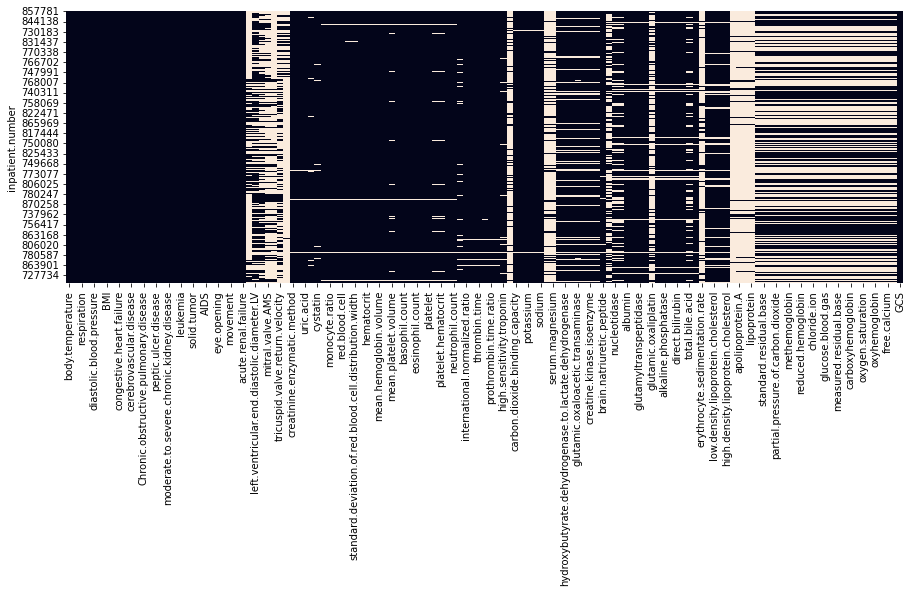

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# set the figure size
plt.rcParams["figure.figsize"]=[15,5]

# plot a heatmap of the missing values in the data
# cbar: specify whether to display the color index or not
sns.heatmap(num_col.isnull(), cbar = False)

# display the plot
plt.show()


In [152]:
null_count=df.isnull().sum().sort_values(ascending=False)
percentage=((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
null_df=pd.concat([null_count,percentage],axis=1,keys=["null_count","percentage"])
null_df


,null_count,percentage
homocysteine,1862,92.729084
lipoprotein,1832,91.235060
apolipoprotein.B,1832,91.235060
apolipoprotein.A,1832,91.235060
tricuspid.valve.return.pressure,1826,90.936255
erythrocyte.sedimentation.rate,1701,84.711155
EA,1615,80.428287
myoglobin,1610,80.179283
serum.magnesium,1601,79.731076
Inorganic.Phosphorus,1601,79.731076


In [153]:
li = []
for column in df:
    ct = df[column].isna().sum()
    if(ct>1300):
        li.append(column)
li_new = {}

for i in li:
    ct = df[i].isna().sum()
    li_new.setdefault(i,ct)


In [154]:
df.drop(li,axis=1,inplace=True)
df.head()

,gender,body.temperature,pulse,respiration,systolic.blood.pressure,diastolic.blood.pressure,map,BMI,type.of.heart.failure,NYHA.cardiac.function.classification,Killip.grade,myocardial.infarction,congestive.heart.failure,peripheral.vascular.disease,cerebrovascular.disease,dementia,Chronic.obstructive.pulmonary.disease,connective.tissue.disease,peptic.ulcer.disease,diabetes,moderate.to.severe.chronic.kidney.disease,hemiplegia,leukemia,malignant.lymphoma,solid.tumor,liver.disease,AIDS,CCI.score,type.II.respiratory.failure,consciousness,eye.opening,verbal.response,movement,respiratory.support.,oxygen.inhalation,fio2,acute.renal.failure,left.ventricular.end.diastolic.diameter.LV,mitral.valve.EMS,tricuspid.valve.return.velocity,creatinine.enzymatic.method,urea,uric.acid,glomerular.filtration.rate,cystatin,white.blood.cell,monocyte.ratio,monocyte.count,red.blood.cell,coefficient.of.variation.of.red.blood.cell.distribution.width,standard.deviation.of.red.blood.cell.distribution.width,mean.corpuscular.volume,hematocrit,lymphocyte.count,mean.hemoglobin.volume,mean.hemoglobin.concentration,mean.platelet.volume,basophil.ratio,basophil.count,eosinophil.ratio,eosinophil.count,hemoglobin,platelet,platelet.distribution.width,platelet.hematocrit,neutrophil.ratio,neutrophil.count,D.dimer,international.normalized.ratio,activated.partial.thromboplastin.time,thrombin.time,prothrombin.activity,prothrombin.time.ratio,fibrinogen,high.sensitivity.troponin,carbon.dioxide.binding.capacity,calcium,potassium,chloride,sodium,creatine.kinase.isoenzyme.to.creatine.kinase,hydroxybutyrate.dehydrogenase.to.lactate.dehydrogenase,hydroxybutyrate.dehydrogenase,glutamic.oxaloacetic.transaminase,creatine.kinase,creatine.kinase.isoenzyme,lactate.dehydrogenase,brain.natriuretic.peptide,high.sensitivity.protein,nucleotidase,fucosidase,albumin,white.globulin.ratio,glutamyltranspeptidase,glutamic.pyruvic.transaminase,indirect.bilirubin,alkaline.phosphatase,globulin,direct.bilirubin,total.bilirubin,total.bile.acid,total.protein,cholesterol,low.density.lipoprotein.cholesterol,triglyceride,high.density.lipoprotein.cholesterol,pH,standard.residual.base,standard.bicarbonate,partial.pressure.of.carbon.dioxide,total.carbon.dioxide,methemoglobin,hematocrit.blood.gas,reduced.hemoglobin,potassium.ion,chloride.ion,sodium.ion,glucose.blood.gas,lactate,measured.residual.base,measured.bicarbonate,carboxyhemoglobin,body.temperature.blood.gas,oxygen.saturation,partial.oxygen.pressure,oxyhemoglobin,anion.gap,free.calcium,total.hemoglobin,GCS,ageCat
inpatient.number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
857781,Male,36.7,87,19,102,64,76.666667,18.590125,Both,III,III,0,0,0,0,0,1,0,0.0,1,0.0,0,0,0,0,0.0,0,2.0,NonTypeII,Clear,4,5,6,None,OxygenTherapy,33,0,NaN,NaN,NaN,108.3,12.55,685.0,58.57,1.32,9.43,0.085,0.80,4.09,15.0,50.3,94.5,0.387,1.51,32.0,338.0,14.0,0.006,0.05,0.002,0.02,131.0,102.0,16.6,0.142,0.746,7.05,1.19,1.39,33.4,17.0,60.3,1.37,3.84,0.094,21.6,2.28,5.59,101.9,134.6,0.22,0.63,185.0,81.0,43.0,9.6,294.0,1500.17,7.6,3.5,20.5,38.1,1.6,83.0,65.0,11.4,61.0,23.8,6.9,18.3,4.9,61.9,3.46,1.90,2.69,0.84,7.44,-3.0,22.7,32.0,22.2,0.3,37.0,3.4,5.63,103.0,136.4,5.8,2.5,-2.1,21.2,0.4,37.0,97.0,93.0,95.9,17.8,1.14,125.0,15,"(69,79]"
743087,Female,36.8,95,18,150,70,96.666667,19.195303,Both,III,I,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0.0,0,0.0,NonTypeII,Clear,4,5,6,None,OxygenTherapy,33,0,40.0,1.16,3.34,62.0,4.29,170.0,85.43,1.25,5.32,0.066,0.35,3.93,13.0,40.7,88.6,0.349,1.18,28.9,326.0,11.3,0.002,0.01,0.009,0.05,114.0,123.0,16.1,0.139,0.702,3.73,1.06,1.16,35.9,18.4,65.1,1.18,2.62,0.017,26.5,2.28,3.62,105.6,144.0,0.16,0.84,170.0,21.0,107.0,17.2,203.0,361.70,NaN,2.2,21.9,40.7,1.6,17.0,19.0,13.1,69.0,25.4,5.2,18.3,2.4,66.1,3.15,1.26,0.84,1.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,"(69,79]"
866418,Male,36.5,98,18,102,67,78.666667,24.221453,Both,II,II,0,0,0,0,0,

In [155]:
df.shape

(2008, 131)

In [156]:
num_col=df.select_dtypes(include="number")

In [157]:
cat_col=df.select_dtypes(include="object")

In [158]:
num_col.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2008 entries, 857781 to 791864
Columns: 122 entries, body.temperature to GCS
dtypes: float64(99), int64(23)
memory usage: 1.9 MB


In [159]:
cat_col.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2008 entries, 857781 to 791864
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   gender                                2008 non-null   object
 1   type.of.heart.failure                 2008 non-null   object
 2   NYHA.cardiac.function.classification  2008 non-null   object
 3   Killip.grade                          2008 non-null   object
 4   type.II.respiratory.failure           2008 non-null   object
 5   consciousness                         2008 non-null   object
 6   respiratory.support.                  2008 non-null   object
 7   oxygen.inhalation                     2008 non-null   object
 8   ageCat                                2008 non-null   object
dtypes: object(9)
memory usage: 156.9+ KB


In [160]:
df.shape

(2008, 131)

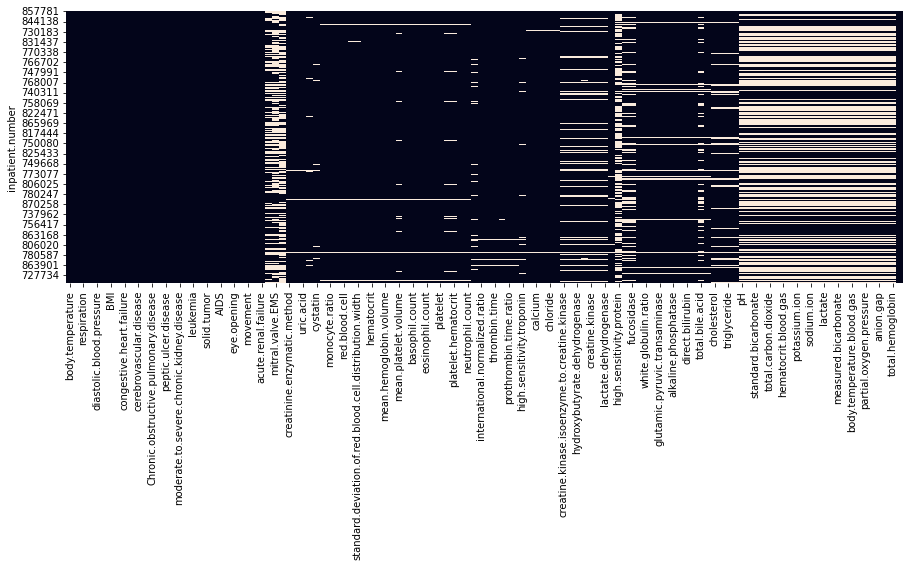

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# set the figure size
plt.rcParams["figure.figsize"]=[15,5]

# plot a heatmap of the missing values in the data
# cbar: specify whether to display the color index or not
sns.heatmap(num_col.isnull(), cbar = False)

# display the plot
plt.show()


In [162]:
df['CCI.score']=df['CCI.score'].dropna()
df['peptic.ulcer.disease']=df['peptic.ulcer.disease'].dropna()
df['moderate.to.severe.chronic.kidney.disease']=df['moderate.to.severe.chronic.kidney.disease'].dropna()
df['liver.disease']=df['liver.disease'].dropna()

In [163]:
df.dropna(subset=['CCI.score', 'peptic.ulcer.disease','moderate.to.severe.chronic.kidney.disease','liver.disease'],inplace=True)

In [164]:
df.shape

(2003, 131)

In [165]:
num_col1=df.select_dtypes(include="number")

In [166]:
num_col1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2003 entries, 857781 to 791864
Columns: 122 entries, body.temperature to GCS
dtypes: float64(99), int64(23)
memory usage: 1.9 MB


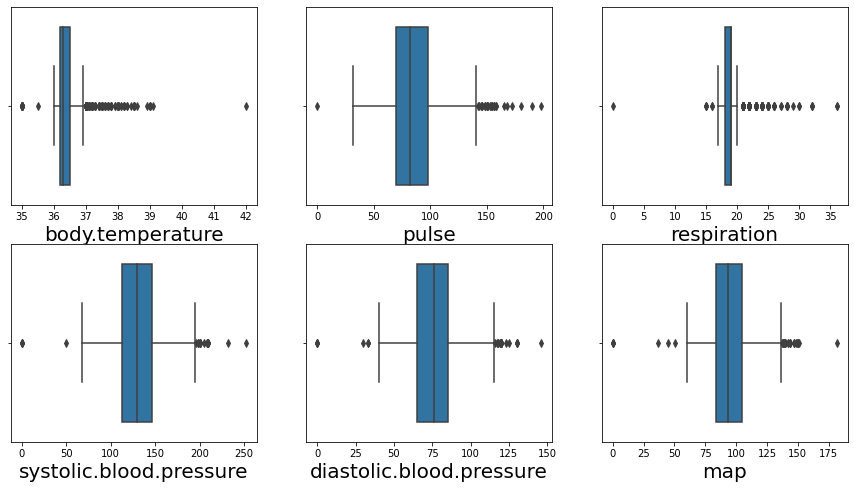

In [167]:
# plot the boxplot for each variable
# subplots(): plot subplots
# figsize(): set the figure size
fig, ax = plt.subplots(2, 3, figsize=(15, 8))

# plot the boxplot using boxplot() from seaborn
# z: let the variable z define the boxplot
# x: data for which the boxplot is to be plotted
# orient: "h" specifies horizontal boxplot (for vertical boxplots use "v")
# whis: proportion of the IQR past the low and high quartiles to extend the plot whiskers
# ax: specifies the axes object to draw the plot o
# set_xlabel(): set the x-axis label
# fontsize: sets the font size of the x-axis label
for variable, subplot in zip(num_col1.columns, ax.flatten()):
    z = sns.boxplot(x = num_col1[variable], orient = "h",whis=1.5 , ax=subplot) # plot the boxplot
    z.set_xlabel(variable, fontsize = 20)  


In [168]:
# z = sns.boxplot(x = num_col1[], orient = "h",whis=1.5 , ax=subplot) # plot the boxplot


In [169]:
for i in num_col1.columns:
    q1=num_col1[i].quantile(0.25)
    q3=num_col1[i].quantile(0.75)
    iqr=q3-q1
    ub=q3 + 1.5*iqr
    lb=q1 - 1.5*iqr
    uc=num_col1[i].quantile(0.99)
    lc=num_col1[i].quantile(0.01)
    for ind1 in num_col1[i].index:
        if num_col1.loc[ind1, i] >ub:            
            num_col1.loc[ind1, i] =uc
        if num_col1.loc[ind1, i] < lb:
            num_col1.loc[ind1, i] =lc


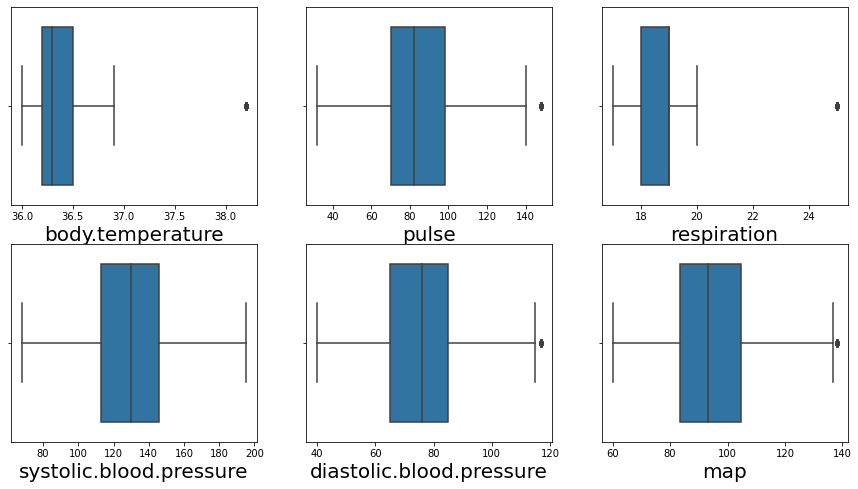

In [170]:
# plot the boxplot for each variable
# subplots(): plot subplots
# figsize(): set the figure size
fig, ax = plt.subplots(2, 3, figsize=(15, 8))

# plot the boxplot using boxplot() from seaborn
# z: let the variable z define the boxplot
# x: data for which the boxplot is to be plotted
# orient: "h" specifies horizontal boxplot (for vertical boxplots use "v")
# whis: proportion of the IQR past the low and high quartiles to extend the plot whiskers
# ax: specifies the axes object to draw the plot o
# set_xlabel(): set the x-axis label
# fontsize: sets the font size of the x-axis label
for variable, subplot in zip(num_col1.columns, ax.flatten()):
    z = sns.boxplot(x = num_col1[variable], orient = "h",whis=1.5 , ax=subplot) # plot the boxplot
    z.set_xlabel(variable, fontsize = 20)  


In [171]:
null_count=df.isna().sum().sort_values(ascending=False)
percentage=((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
null_df=pd.concat([null_count,percentage],axis=1,keys=["null_count","percentage"])
null_df


,null_count,percentage
tricuspid.valve.return.velocity,1214,60.609086
high.sensitivity.protein,1066,53.220170
mitral.valve.EMS,1027,51.273090
total.hemoglobin,1012,50.524214
oxyhemoglobin,1012,50.524214
carboxyhemoglobin,1012,50.524214
methemoglobin,1012,50.524214
hematocrit.blood.gas,1012,50.524214
reduced.hemoglobin,1012,50.524214
standard.bicarbonate,1011,50.474289


In [172]:
#drop body temperature blood gas, it is always 37
df.drop(['body.temperature.blood.gas'],axis=1,inplace=True)

In [173]:
# df2 =pd.read_csv(r'C:\Users\Vinayak\minor_proj\collabRV\EDA\drug_dict_onehot.csv',index_col=[0])
# df3= pd.read_csv(r"D:\git_minor\collabRV\Raw Sets\dat_md- Cardiac Dataset.csv",index_col=[1])

In [174]:
# df2.tail(10)

In [175]:
# df3.head(10)

In [176]:
# df3.shape

In [177]:
df['gender'].replace('Female',0,inplace=True)
df['gender'].replace('Male',1,inplace=True)

df['type.of.heart.failure'].replace('Left',0,inplace=True)
df['type.of.heart.failure'].replace('Right',1,inplace=True)
df['type.of.heart.failure'].replace('Both',2,inplace=True)

df['NYHA.cardiac.function.classification'].replace('III',3,inplace=True)
df['NYHA.cardiac.function.classification'].replace('II',2,inplace=True)
df['NYHA.cardiac.function.classification'].replace('IV',4,inplace=True)

df['Killip.grade'].replace('I',1,inplace=True)
df['Killip.grade'].replace('II',2,inplace=True)
df['Killip.grade'].replace('III',3,inplace=True)
df['Killip.grade'].replace('IV',4,inplace=True)

df['type.II.respiratory.failure'].replace('NonTypeII',0,inplace=True)
df['type.II.respiratory.failure'].replace('TypeII',1,inplace=True)

df['consciousness'].replace('Clear',1,inplace=True)
df['consciousness'].replace('ResponsiveToPain',2,inplace=True)
df['consciousness'].replace('ResponsiveToSound',3,inplace=True)
df['consciousness'].replace('Nonresponsive',4,inplace=True)

df['oxygen.inhalation'].replace('OxygenTherapy',0,inplace=True)
df['oxygen.inhalation'].replace('AmbientAir',1,inplace=True)

df['ageCat'].replace('(21,29]',25,inplace=True)
df['ageCat'].replace('(29,39]',35,inplace=True)
df['ageCat'].replace('(39,49]',45,inplace=True)
df['ageCat'].replace('(49,59]',55,inplace=True)
df['ageCat'].replace('(59,69]',65,inplace=True)
df['ageCat'].replace('(69,79]',75,inplace=True)
df['ageCat'].replace('(79,89]',85,inplace=True)
df['ageCat'].replace('(89,110]',100,inplace=True)

df["respiratory.support."]=df["respiratory.support."].replace("None",0)
df["respiratory.support."]=df["respiratory.support."].replace("IMV",1)
df["respiratory.support."]=df["respiratory.support."].replace("NIMV",2)



In [178]:
df.head()

,gender,body.temperature,pulse,respiration,systolic.blood.pressure,diastolic.blood.pressure,map,BMI,type.of.heart.failure,NYHA.cardiac.function.classification,Killip.grade,myocardial.infarction,congestive.heart.failure,peripheral.vascular.disease,cerebrovascular.disease,dementia,Chronic.obstructive.pulmonary.disease,connective.tissue.disease,peptic.ulcer.disease,diabetes,moderate.to.severe.chronic.kidney.disease,hemiplegia,leukemia,malignant.lymphoma,solid.tumor,liver.disease,AIDS,CCI.score,type.II.respiratory.failure,consciousness,eye.opening,verbal.response,movement,respiratory.support.,oxygen.inhalation,fio2,acute.renal.failure,left.ventricular.end.diastolic.diameter.LV,mitral.valve.EMS,tricuspid.valve.return.velocity,creatinine.enzymatic.method,urea,uric.acid,glomerular.filtration.rate,cystatin,white.blood.cell,monocyte.ratio,monocyte.count,red.blood.cell,coefficient.of.variation.of.red.blood.cell.distribution.width,standard.deviation.of.red.blood.cell.distribution.width,mean.corpuscular.volume,hematocrit,lymphocyte.count,mean.hemoglobin.volume,mean.hemoglobin.concentration,mean.platelet.volume,basophil.ratio,basophil.count,eosinophil.ratio,eosinophil.count,hemoglobin,platelet,platelet.distribution.width,platelet.hematocrit,neutrophil.ratio,neutrophil.count,D.dimer,international.normalized.ratio,activated.partial.thromboplastin.time,thrombin.time,prothrombin.activity,prothrombin.time.ratio,fibrinogen,high.sensitivity.troponin,carbon.dioxide.binding.capacity,calcium,potassium,chloride,sodium,creatine.kinase.isoenzyme.to.creatine.kinase,hydroxybutyrate.dehydrogenase.to.lactate.dehydrogenase,hydroxybutyrate.dehydrogenase,glutamic.oxaloacetic.transaminase,creatine.kinase,creatine.kinase.isoenzyme,lactate.dehydrogenase,brain.natriuretic.peptide,high.sensitivity.protein,nucleotidase,fucosidase,albumin,white.globulin.ratio,glutamyltranspeptidase,glutamic.pyruvic.transaminase,indirect.bilirubin,alkaline.phosphatase,globulin,direct.bilirubin,total.bilirubin,total.bile.acid,total.protein,cholesterol,low.density.lipoprotein.cholesterol,triglyceride,high.density.lipoprotein.cholesterol,pH,standard.residual.base,standard.bicarbonate,partial.pressure.of.carbon.dioxide,total.carbon.dioxide,methemoglobin,hematocrit.blood.gas,reduced.hemoglobin,potassium.ion,chloride.ion,sodium.ion,glucose.blood.gas,lactate,measured.residual.base,measured.bicarbonate,carboxyhemoglobin,oxygen.saturation,partial.oxygen.pressure,oxyhemoglobin,anion.gap,free.calcium,total.hemoglobin,GCS,ageCat
inpatient.number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
857781,1,36.7,87,19,102,64,76.666667,18.590125,2,3,3,0,0,0,0,0,1,0,0.0,1,0.0,0,0,0,0,0.0,0,2.0,0,1,4,5,6,0,0,33,0,NaN,NaN,NaN,108.3,12.55,685.0,58.57,1.32,9.43,0.085,0.80,4.09,15.0,50.30,94.5,0.387,1.51,32.0,338.0,14.0,0.006,0.05,0.002,0.02,131.0,102.0,16.600,0.142,0.746,7.05,1.19,1.39,33.4,17.0,60.3,1.37,3.84,0.09400,21.6,2.28,6.21,101.9,134.6,0.22,0.63,185.0,725.29,43.0,9.6,294.0,1500.17,7.6,3.50,20.5,38.1,1.6,83.0,65.0,11.4,61.0,23.8,6.9,18.3,4.9,61.9,3.46,1.90,4.028,0.84,7.44,-3.0,22.7,32.0,22.2,0.3,37.0,3.4,5.98,103.0,136.4,5.8,2.5,-2.1,21.2,0.4,97.0,93.0,95.9,17.8,1.14,125.0,15,75
743087,0,36.8,95,18,150,70,96.666667,19.195303,2,3,1,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0.0,0,0.0,0,1,4,5,6,0,0,33,0,40.0,1.16,3.34,62.0,4.29,170.0,85.43,1.25,5.32,0.066,0.35,3.93,13.0,40.70,88.6,0.349,1.18,28.9,326.0,11.3,0.002,0.01,0.009,0.05,114.0,123.0,16.100,0.139,0.702,3.73,1.06,1.16,35.9,18.4,65.1,1.18,2.62,0.01700,26.5,2.28,3.62,105.6,144.0,0.16,0.84,170.0,21.00,107.0,17.2,203.0,361.70,NaN,2.20,21.9,40.7,1.6,17.0,19.0,13.1,69.0,25.4,5.2,18.3,2.4,66.1,3.15,1.26,0.840,1.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,75
866418,1,36.5,98,18,102,67,78.666667,24.221453,2,2,2,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0.0,0,0.0,0,1,4,5,6,0,0,33,0,46.0,0.84,2.80,185.1,15.99,567.0,31.51,2.43,13.01,0.051,0.67,4.43

In [179]:
df.shape

(2003, 130)

In [180]:
null_count=df.isna().sum().sort_values(ascending=False)
percentage=((df.isna().sum()/df.isna().count())*100).sort_values(ascending=False)
null_df=pd.concat([null_count,percentage],axis=1,keys=["null_count","percentage"])
null_df

,null_count,percentage
tricuspid.valve.return.velocity,1214,60.609086
high.sensitivity.protein,1066,53.220170
mitral.valve.EMS,1027,51.273090
reduced.hemoglobin,1012,50.524214
total.hemoglobin,1012,50.524214
oxyhemoglobin,1012,50.524214
carboxyhemoglobin,1012,50.524214
methemoglobin,1012,50.524214
hematocrit.blood.gas,1012,50.524214
chloride.ion,1011,50.474289


In [185]:
null_df.to_csv("NAN.csv")

In [181]:
import random
df.drop(['tricuspid.valve.return.velocity'],axis=1,inplace=True)

In [182]:
df['high.sensitivity.protein'] = df['high.sensitivity.protein'].fillna(random.uniform(0.5,4.5))

In [186]:
df['mitral.valve.EMS'] = df['mitral.valve.EMS'].fillna(random.uniform(0.65,0.75))
df['reduced.hemoglobin'] = df['reduced.hemoglobin'].fillna(random.uniform(0.5,4.5))
df['total.hemoglobin'] = df['total.hemoglobin'].fillna(random.uniform(135,170))
df['oxyhemoglobin'] = df['oxyhemoglobin'].fillna(random.uniform(94.5,96.5))
df['carboxyhemoglobin'] = df['carboxyhemoglobin'].fillna(random.uniform(0.1,1.5))
df['methemoglobin'] = df['methemoglobin'].fillna(random.uniform(0.5,5.5))
df['hematocrit.blood.gas'] = df['hematocrit.blood.gas'].fillna(random.uniform(0.,0.5))
df['chloride.ion'] = df['chloride.ion'].fillna(random.uniform(100,109))
df['pH'] = df['pH'].fillna(random.uniform(7.36,7.44))
df['standard.bicarbonate'] = df['standard.bicarbonate'].fillna(random.uniform(22,26.5))
df['partial.pressure.of.carbon.dioxide'] = df['partial.pressure.of.carbon.dioxide'].fillna(random.uniform(36,44))
df['total.carbon.dioxide'] = df['total.carbon.dioxide'].fillna(random.uniform(25,31))
df['potassium.ion'] = df['potassium.ion'].fillna(random.uniform(3.6,4.4))
df['standard.residual.base'] = df['standard.residual.base'].fillna(random.uniform(-2.8,2.8))
df['sodium.ion'] = df['sodium.ion'].fillna(random.uniform(136,146))
df['free.calcium'] = df['free.calcium'].fillna(random.uniform(1.16,1.28))
df['glucose.blood.gas'] = df['glucose.blood.gas'].fillna(random.uniform(4,6))
df['lactate'] = df['lactate'].fillna(random.uniform(0.6,2.1))
df['measured.residual.base'] = df['measured.residual.base'].fillna(random.uniform(-2.8,2.8))
df['measured.bicarbonate'] = df['measured.bicarbonate'].fillna(random.uniform(23,29))
df['oxygen.saturation'] = df['oxygen.saturation'].fillna(random.uniform(93.5,97.5))
df['partial.oxygen.pressure'] = df['partial.oxygen.pressure'].fillna(random.uniform(83,108))
df['anion.gap'] = df['anion.gap'].fillna(random.uniform(12,16))
df['left.ventricular.end.diastolic.diameter.LV'] = df['left.ventricular.end.diastolic.diameter.LV'].fillna(random.uniform(3.5,5.6))
df['fucosidase'] = df['fucosidase'].fillna(random.uniform(0,40))
df['nucleotidase'] = df['nucleotidase'].fillna(random.uniform(0,10))
df['total.bile.acid'] = df['total.bile.acid'].fillna(random.uniform(0,20))
df['glutamic.oxaloacetic.transaminase'] = df['glutamic.oxaloacetic.transaminase'].fillna(random.uniform(15,40))
df['hydroxybutyrate.dehydrogenase'] = df['hydroxybutyrate.dehydrogenase'].fillna(random.uniform(90,180))
df['creatine.kinase.isoenzyme.to.creatine.kinase'] = df['creatine.kinase.isoenzyme.to.creatine.kinase'].fillna(random.uniform(0,0.05))
df['creatine.kinase'] = df['creatine.kinase'].fillna(random.uniform(22,270))
df['hydroxybutyrate.dehydrogenase.to.lactate.dehydrogenase'] = df['hydroxybutyrate.dehydrogenase.to.lactate.dehydrogenase'].fillna(random.uniform(0.2,0.8))
df['lactate.dehydrogenase'] = df['lactate.dehydrogenase'].fillna(random.uniform(90,282))
df['creatine.kinase.isoenzyme'] = df['creatine.kinase.isoenzyme'].fillna(random.uniform(0,32))
df['cholesterol'] = df['cholesterol'].fillna(random.uniform(2.9,5.68))
df['low.density.lipoprotein.cholesterol'] = df['low.density.lipoprotein.cholesterol'].fillna(random.uniform(0,3.36))
df['triglyceride'] = df['triglyceride'].fillna(random.uniform(0.2,2.26))
df['high.density.lipoprotein.cholesterol'] = df['high.density.lipoprotein.cholesterol'].fillna(random.uniform(0.9,2.19))
df['D.dimer'] = df['D.dimer'].fillna(random.uniform(0,0.55))
df['platelet.distribution.width'] = df['platelet.distribution.width'].fillna(random.uniform(9,17))
df['mean.platelet.volume'] = df['mean.platelet.volume'].fillna(random.uniform(6.5,12))
df['platelet.hematocrit'] = df['platelet.hematocrit'].fillna(random.uniform(0.108,0.282))
df['glutamyltranspeptidase'] = df['glutamyltranspeptidase'].fillna(random.uniform(10,60))
df['albumin'] = df['albumin'].fillna(random.uniform(40,55))
df['indirect.bilirubin'] = df['indirect.bilirubin'].fillna(random.uniform(0,16))
df['white.globulin.ratio'] = df['white.globulin.ratio'].fillna(random.uniform(1.2,2.4))
df['glutamic.pyruvic.transaminase'] = df['glutamic.pyruvic.transaminase'].fillna(random.uniform(9,50))
df['total.protein'] = df['total.protein'].fillna(random.uniform(65,85))
df['total.bilirubin'] = df['total.bilirubin'].fillna(random.uniform(2,20.4))
df['direct.bilirubin'] = df['direct.bilirubin'].fillna(random.uniform(0,6.8))
df['globulin'] = df['globulin'].fillna(random.uniform(20,40))
df['alkaline.phosphatase'] = df['alkaline.phosphatase'].fillna(random.uniform(45,125))
df['high.sensitivity.troponin'] = df['high.sensitivity.troponin'].fillna(random.uniform(0,14))
df['glomerular.filtration.rate'] = df['glomerular.filtration.rate'].fillna(random.uniform(90,120))
df['prothrombin.activity'] = df['prothrombin.activity'].fillna(random.uniform(70,120))
df['cystatin'] = df['cystatin'].fillna(random.uniform(0.51,0.98))
df['brain.natriuretic.peptide'] = df['brain.natriuretic.peptide'].fillna(random.uniform(0,100))
# df['prothrombin.time.ratio'] = df['prothrombin.time.ratio'].fillna(random.uniform())
df['international.normalized.ratio'] = df['international.normalized.ratio'].fillna(random.uniform(0.8,1.5))
df['thrombin.time'] = df['thrombin.time'].fillna(random.uniform(14,21))
df['fibrinogen'] = df['fibrinogen'].fillna(random.uniform(2,4))
df['activated.partial.thromboplastin.time'] = df['activated.partial.thromboplastin.time'].fillna(random.uniform(20,40))
df['standard.deviation.of.red.blood.cell.distribution.width'] = df['standard.deviation.of.red.blood.cell.distribution.width'].fillna(random.uniform(40,53))
df['coefficient.of.variation.of.red.blood.cell.distribution.width'] = df['coefficient.of.variation.of.red.blood.cell.distribution.width'].fillna(random.uniform(0,15))
df['mean.hemoglobin.volume'] = df['mean.hemoglobin.volume'].fillna(random.uniform(27,35))
df['hemoglobin'] = df['hemoglobin'].fillna(random.uniform(110,160))
df['hematocrit'] = df['hematocrit'].fillna(random.uniform(35,50))
df['mean.corpuscular.volume'] = df['mean.corpuscular.volume'].fillna(random.uniform(82,96))
df['neutrophil.ratio'] = df['neutrophil.ratio'].fillna(random.uniform(0.5,0.7))
df['neutrophil.count'] = df['neutrophil.count'].fillna(random.uniform(2,7))
df['basophil.count'] = df['basophil.count'].fillna(random.uniform(0,0.1))
df['white.blood.cell'] = df['white.blood.cell'].fillna(random.uniform(4,10))
df['monocyte.count'] = df['monocyte.count'].fillna(random.uniform(0.2,0.8))
df['red.blood.cell'] = df['red.blood.cell'].fillna(random.uniform(3.5,5.5))
df['lymphocyte.count'] = df['lymphocyte.count'].fillna(random.uniform(0.8,4))
df['mean.hemoglobin.concentration'] = df['mean.hemoglobin.concentration'].fillna(random.uniform(320,360))
df['platelet'] = df['platelet'].fillna(random.uniform(100,300))
df['basophil.ratio'] = df['basophil.ratio'].fillna(random.uniform(0,1))
df['eosinophil.ratio'] = df['eosinophil.ratio'].fillna(random.uniform(0.5,5))
df['monocyte.ratio'] = df['monocyte.ratio'].fillna(random.uniform(3,11.4))
df['uric.acid'] = df['uric.acid'].fillna(random.uniform(150,440))
df['urea'] = df['urea'].fillna(random.uniform(1.7,8.3))
df['creatinine.enzymatic.method'] = df['creatinine.enzymatic.method'].fillna(random.uniform(44,110))
df['sodium'] = df['sodium'].fillna(random.uniform(137,147))
df['chloride'] = df['chloride'].fillna(random.uniform(99,110))
df['potassium'] = df['potassium'].fillna(random.uniform(3.5,4.5))
df['calcium'] = df['calcium'].fillna(random.uniform(2.11,2.52))
df['carbon.dioxide.binding.capacity'] = df['carbon.dioxide.binding.capacity'].fillna(random.uniform(22,30))

In [188]:
df.drop(['prothrombin.time.ratio'],axis=1,inplace=True)
df['eosinophil.count'] = df['eosinophil.count'].fillna(random.uniform(0.02,0.5))


In [189]:
null_count=df.isna().sum().sort_values(ascending=False)
percentage=((df.isna().sum()/df.isna().count())*100).sort_values(ascending=False)
null_df=pd.concat([null_count,percentage],axis=1,keys=["null_count","percentage"])
null_df

,null_count,percentage
gender,0,0.0
body.temperature,0,0.0
alkaline.phosphatase,0,0.0
indirect.bilirubin,0,0.0
glutamic.pyruvic.transaminase,0,0.0
glutamyltranspeptidase,0,0.0
white.globulin.ratio,0,0.0
albumin,0,0.0
fucosidase,0,0.0
nucleotidase,0,0.0
